<a href="https://colab.research.google.com/github/Shashanklokre07/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data using pandas
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECT DATA /creditcard.csv")

In [3]:
# about the data
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df['Class'].unique()

array([0, 1])

In [7]:
# Splitting the train , test data

X = df.drop("Class" ,axis = 1 )
y = df['Class']
scaler = StandardScaler()
# splitting the data
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,stratify= y ,random_state = 42 )


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Training the model

dt = DecisionTreeClassifier(max_depth = 5 , random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
y_pred = dt.predict(X_test)

In [11]:
# Evaluating the result

from sklearn.metrics import (
    precision_recall_curve, roc_curve, auc, average_precision_score,
    precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



precision = 0.89 , its correct 89% for the time


recall = = 0.78 , it can detect the fraud 78% of the  time

so it works


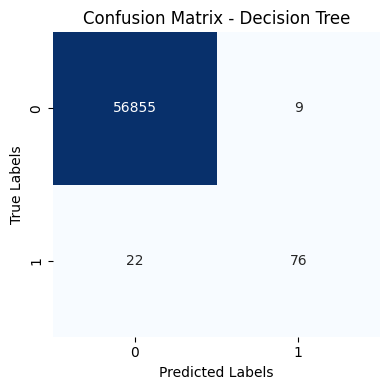

In [13]:
cm = confusion_matrix(y_test,y_pred)

#CONFUSION matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()